In [1]:
import numpy as np
from scipy.io import loadmat

import matplotlib.pyplot as plt
%matplotlib inline 

# cross validation using grid search
from sklearn.model_selection import GridSearchCV
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
    
from sklearn.neighbors import KNeighborsClassifier
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

# confusion matrix
from sklearn import metrics
# http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html




#from tqdm import tqdm # for progressive bar

from sklearn.externals import joblib # to save model


from P300.data import load_data


## For training use `train_kNN_cv.py`

```
python train_kNN_cv A
python train_kNN_cv B
python train_kNN_cv AandB
```


## Analyze training results

In [2]:
def plot_results_kNN(results):
    k = np.array(results['param_n_neighbors'].data, dtype=int)
    mean_test_score = results['mean_test_score']
    std_test_score = results['std_test_score']

    print(mean_test_score)
    print(std_test_score)

    #plt.plot(k, mean_test_score)
    plt.errorbar(k, mean_test_score, std_test_score)

    plt.xlabel('k')
    plt.ylabel('mean_test_score')

# plotting code from https://scikit-learn.org/stable/auto_examples/model_selection/plot_multi_metric_evaluation.html




/Users/yyoo/tf11/lib/python3.7/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator KNeighborsClassifier from version 0.20.1 when using version 0.20.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


[0.77457516 0.8196732  0.80529412 0.82503268 0.8179085  0.82856209
 0.82535948]
[0.00752174 0.00275287 0.00337346 0.00260292 0.0015659  0.00100407
 0.00121576]


/Users/yyoo/tf11/lib/python3.7/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator GridSearchCV from version 0.20.1 when using version 0.20.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


Text(0.5, 1.0, 'Subject A')

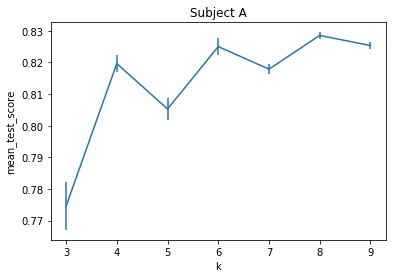

In [3]:
subject_train = 'A'
num_ch = 64
cv = joblib.load("model/{}_kNN_cv_ch{}.model".format(subject_train,num_ch))

results = cv.cv_results_
#print(results)
plot_results_kNN(results)

plt.title('Subject {}'.format(subject_train))

[0.79326797 0.82503268 0.81470588 0.82875817 0.82326797 0.82960784
 0.82771242]
[0.00452163 0.00167402 0.00311402 0.00211789 0.00165864 0.00100407
 0.00056224]


Text(0.5, 1.0, 'Subject B')

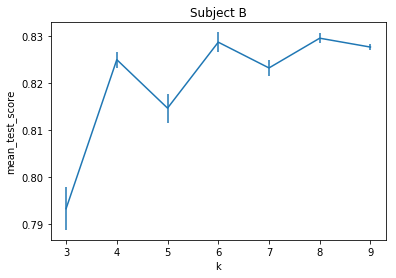

In [4]:
subject_train = 'B'
num_ch = 64
cv = joblib.load("model/{}_kNN_cv_ch{}.model".format(subject_train,num_ch))

results = cv.cv_results_
#print(results)
plot_results_kNN(results)

plt.title('Subject {}'.format(subject_train))

[0.79062092 0.82388889 0.8124183  0.82787582 0.82379085 0.83127451
 0.82859477]
[0.00182715 0.00078974 0.00129899 0.00121663 0.0015522  0.00046904
 0.00124441]


Text(0.5, 1.0, 'Subject AandB')

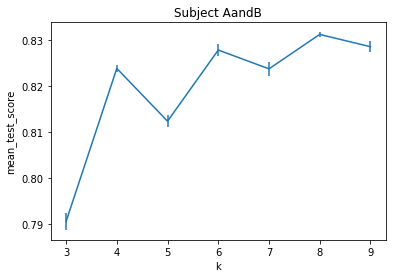

In [5]:
subject_train = 'AandB'
num_ch = 64
cv = joblib.load("model/{}_kNN_cv_ch{}.model".format(subject_train,num_ch))

results = cv.cv_results_
#print(results)
plot_results_kNN(results)

plt.title('Subject {}'.format(subject_train))

## k-nearest neighbor classifier